# Feature Selection

### Imports

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso

### Create Dataframe

In [12]:
extracted_features = pd.read_csv('data/extracted_features.csv')
target_column = 'price actual'

### Pearson Correlation

In [13]:
cor = extracted_features.corr(numeric_only=True)
cor_target = abs(cor[target_column])

#Selecting highly correlated features
relative_features = cor_target[cor_target>0.45]
print(relative_features)

selected_features = pd.DataFrame()
for feature in relative_features.index:
    selected_features[feature] = extracted_features[feature]

generation fossil hard coal                        0.516080
price actual                                       1.000000
generation hydro pumped storage consumption        0.469723
generation fossil hard coal ewm                    0.508245
price actual ewm                                   0.982482
generation hydro pumped storage consumption ewm    0.460695
Name: price actual, dtype: float64


### LASSO

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.266e+06, tolerance: 4.775e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+06, tolerance: 4.768e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

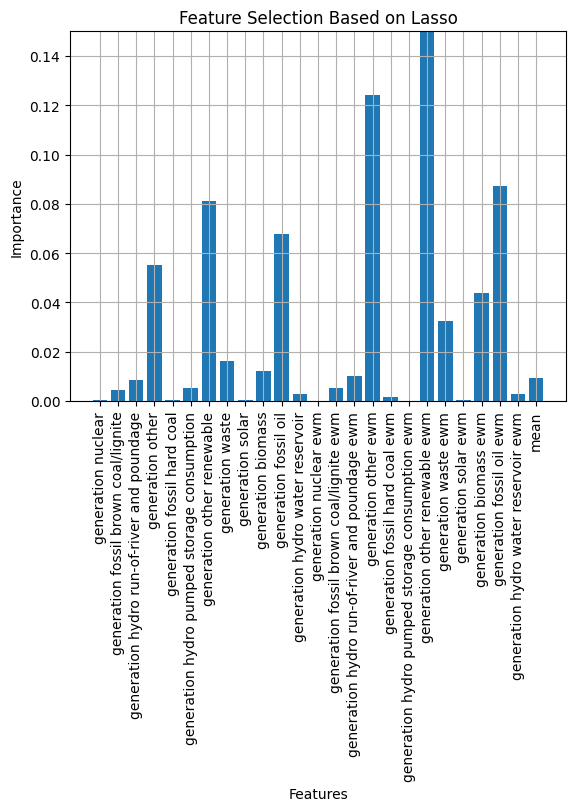

Selected Features: 
generation other renewable
generation other ewm
generation other renewable ewm
generation fossil oil ewm


In [14]:
y = extracted_features[target_column].values

try:
    extracted_features = extracted_features.drop(['time'], axis=1)
    extracted_features = extracted_features.drop([target_column], axis=1)
    extracted_features = extracted_features.drop([target_column + ' ewm'], axis=1)
except:
    pass

X = extracted_features.values

# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf = KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv = GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)

names = extracted_features.columns

# calling the model with the best parameter
lasso1 = Lasso(alpha=0.001)
lasso1.fit(X, y)
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

#show in terminal the feature extracted
print("Selected Features: ")
for i in range(len(names)):
    if lasso1_coef[i] > 0.08:
        selected_features[names[i]] = extracted_features[names[i]]
        print(names[i])

### Save to CSV

In [15]:
selected_features.to_csv('data/selected_features.csv', index=False)